In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [4]:
df = pd.read_csv("/content/smart watch.txt")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [ ]:
df["TotalSteps"].describe()

count      940.000000
mean      7637.910638
std       5087.150742
min          0.000000
25%       3789.750000
50%       7405.500000
75%      10727.000000
max      36019.000000
Name: TotalSteps, dtype: float64

Treating the outlayers with percentile

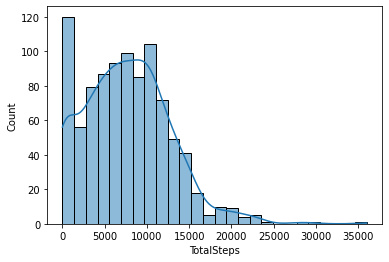

In [ ]:
sns.histplot(df.TotalSteps,kde=True)

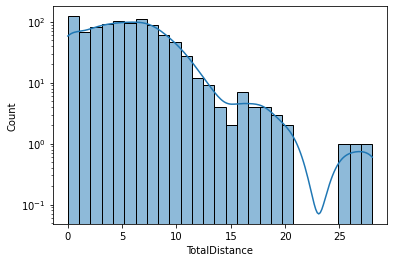

In [ ]:
sns.histplot(df.TotalDistance,kde=True)
plt.yscale("log")

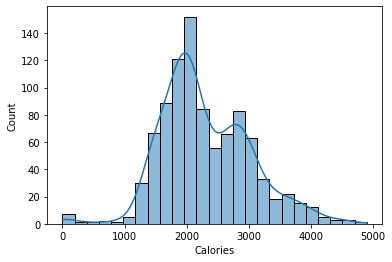

In [ ]:
sns.histplot(df.Calories,kde=True)

#Treating the outliers using percentile

In [ ]:
df.shape

(940, 15)

In [ ]:
df.Calories.describe()

count     940.000000
mean     2303.609574
std       718.166862
min         0.000000
25%      1828.500000
50%      2134.000000
75%      2793.250000
max      4900.000000
Name: Calories, dtype: float64

In [ ]:
lower_limit,upper_limit = df.Calories.quantile([0.001,0.009])
lower_limit,upper_limit

(0.0, 521.1619999999997)

In [ ]:
#outlayers
outlayer = df[(df.Calories>upper_limit) | (df.Calories<lower_limit)]
outlayer.sample(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
237,2320127002,5/3/2016,7443,5.02,5.02,0.0,1.49,0.37,3.16,0.0,20,10,206,1204,1878
682,6962181067,4/14/2016,1551,1.03,1.03,0.0,0.00,0.00,1.03,0.0,0,0,86,862,1466
428,4388161847,4/28/2016,10074,7.75,7.75,0.0,1.29,0.43,6.03,0.0,19,9,234,878,2969
901,8792009665,5/3/2016,2421,1.55,1.55,0.0,0.00,0.00,1.55,0.0,0,0,156,739,2297
701,6962181067,5/3/2016,12109,8.12,8.12,0.0,1.74,2.04,4.33,0.0,21,36,267,654,2072
253,2347167796,4/18/2016,8247,5.45,5.45,0.0,0.79,0.86,3.79,0.0,11,16,206,678,1944
895,8792009665,4/27/2016,1758,1.13,1.13,0.0,0.00,0.00,1.13,0.0,0,0,112,900,2067
136,1927972279,4/25/2016,152,0.11,0.11,0.0,0.00,0.00,0.11,0.0,0,0,12,1303,2100
287,2873212765,5/4/2016,8278,5.56,5.56,0.0,0.00,0.00,5.56,0.0,0,0,420,1020,2015
10,1503960366,4/22/2016,12764,8.13,8.13,0.0,4.76,1.12,2.24,0.0,66,27,130,1217,1827


In [ ]:
df2 = df[(df.Calories<upper_limit) & (df.Calories>lower_limit)]
df2.shape

(5, 15)

In [ ]:
df.shape[0]-df2.shape[0]

935

LoL removed entire data set haha




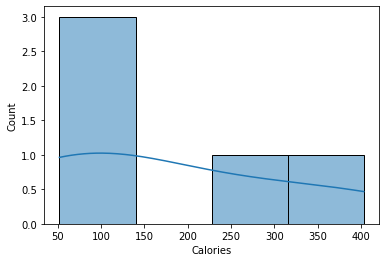

In [ ]:
sns.histplot(df2.Calories,kde=True)

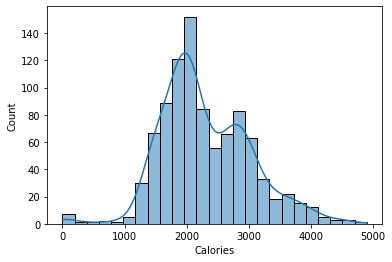

In [ ]:
sns.histplot(df.Calories,kde=True)

Removing outliers using 3standard deviation

In [ ]:
max_limit = df.Calories.mean()+ 3*df.Calories.std()
min_limit = df.Calories.mean()- 3*df.Calories.std()
max_limit,min_limit

(4458.110160870852, 149.1089880653176)

In [ ]:
outliers=df[(df.Calories>max_limit) | (df.Calories<min_limit)]
outliers.shape

(12, 15)

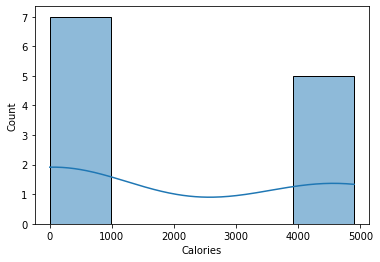

In [ ]:
sns.histplot(outliers.Calories,kde=True)

In [ ]:
#removing outlayers
df3 = df[(df.Calories<max_limit) & (df.Calories>min_limit)]
df3.shape

(928, 15)

In [ ]:
df.shape[0]-df3.shape[0]

12

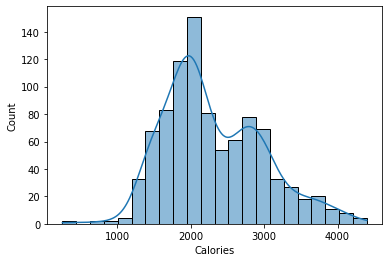

In [ ]:
sns.histplot(df3.Calories,kde=True)

In [ ]:
df["zscore"]= (df.Calories-df.Calories.mean())/df.Calories.std()

In [ ]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,zscore
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,-0.443643
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,-0.705420
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,-0.734662
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,-0.777827
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,-0.613520


In [ ]:
outliers_z = df[(df.Calories<-3) | (df.Calories>3)]
outliers_z.shape

(936, 16)

In [ ]:
df.shape[0]-outliers_z.shape[0]

4

In [ ]:
df4=df[(df.Calories>-3)& (df.Calories<4)]

In [ ]:
df.shape[0]-df4.shape[0]

936

In [5]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [6]:
df["TotalSteps"].describe()

count      940.000000
mean      7637.910638
std       5087.150742
min          0.000000
25%       3789.750000
50%       7405.500000
75%      10727.000000
max      36019.000000
Name: TotalSteps, dtype: float64

In [13]:
percentile_99 =df.TotalSteps.quantile(0.99)

In [19]:
outliers = df[df.TotalSteps>percentile_99]
outliers.shape


(10, 15)

#Remove outliers using percentile

In [21]:
df_no_outliers = df[df.TotalSteps<=percentile_99]
df_no_outliers

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [22]:
df_no_outliers.shape[0]-outliers.shape[0]

920

In [23]:
df.Calories.mean()

2303.609574468085

In [ ]:
#not a good practice to fill missing values with mean
df.fillna(df.Calories.mean())

In [ ]:
#fill missing values with median or mode
df.fillna(df.Calories.median())
df.fillna(df.Calories.mode()[0])

In [31]:
x = ["a,","b","c","d","e","f"]

In [32]:
x[:4:-2]

['f']